In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import pandas as pd
import numpy as np
import rpy2

In [3]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('../data/pitchfork.sqlite')

In [4]:
%load_ext rpy2.ipython

In [5]:
%R library('ggplot2')
%R library(scales)

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



array(['scales', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [6]:
%R library(ggridges)

R[write to console]: 
Attaching package: ‘ggridges’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual




array(['ggridges', 'scales', 'ggplot2', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], dtype='<U9')

In [7]:
content = pd.read_sql('Select * from content',conn)

In [8]:
reviews = pd.read_sql('Select * from reviews',conn)

In [9]:
reviews = pd.merge(reviews,content,how='inner',on='reviewid')

In [10]:
genres = pd.read_sql('Select * from genres',conn)

In [11]:
reviews = pd.merge(reviews,genres,how='inner',on='reviewid')

In [13]:
sentiment_df = pd.read_csv('../data/sentiment_scores.csv')

In [14]:
sentiment_genre = pd.merge(reviews,sentiment_df,how='inner',on=['artist','title'])[['artist','title','genre','neu','compound']]

In [15]:
sentiment_genre = sentiment_genre.dropna()

In [16]:
median_order = sentiment_genre.groupby('genre').median().sort_values(by='neu',ascending=True).reset_index().genre

In [17]:
custom_type = pd.CategoricalDtype(list(median_order),ordered=True)
sentiment_genre.genre = sentiment_genre.genre.astype(custom_type)

In [18]:
sentiment_genre['genre_flag'] = 'not_global'
sentiment_genre.loc[sentiment_genre.genre=='global','genre_flag'] = 'global'

In [19]:
sentiment_genre['genre'] = sentiment_genre['genre'].apply(lambda x: x.capitalize())

In [20]:
%R -i sentiment_genre

R[write to console]: Picking joint bandwidth of 0.00929



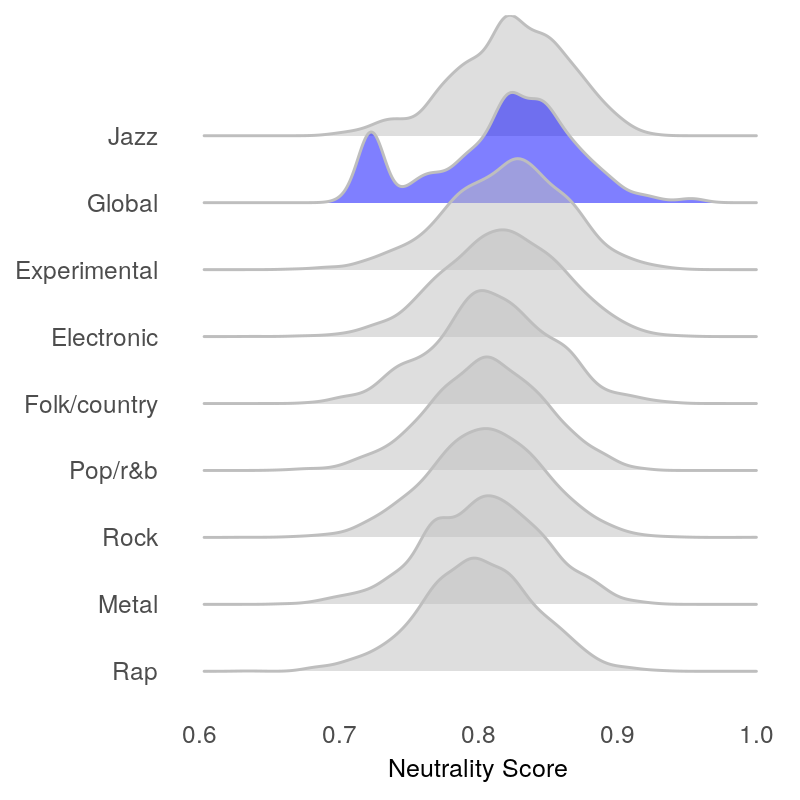

In [21]:
%%R  -w 4 -h 4 --units in -r 200 

neu_density <- ggplot() + #geom_point(aes(x = score_bin, y = stream_count),data=stream_df)
    geom_density_ridges(aes(x = neu, y = genre,fill=genre_flag),color='grey',alpha=0.5,data=sentiment_genre) +
    theme_minimal() +
    scale_x_continuous(limits=c(0.6,1))+
    scale_fill_manual(values=c('blue','grey')) +
    guides(fill=FALSE) +
    xlab('Neutrality Score') +
    theme(axis.title.y = element_blank(),panel.grid.major.y=element_blank(),
          panel.grid.major.x=element_blank(),panel.grid.minor.x=element_blank(),
         axis.title.x = element_text(size=9)) 
print(neu_density)

In [22]:
%R ggsave(neu_density,file='output_png/neutrality.png', device=png(width = 4, height = 4, units = "in", res=300))

R[write to console]: Saving 4 x 4 in image

R[write to console]: Picking joint bandwidth of 0.00929

